In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,10
from sklearn.metrics import mean_squared_error
from math import sqrt

In [31]:
oil=pd.read_csv('BrentOilPrices.csv')

In [32]:
oil.head()

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [33]:
oil.dtypes

Date      object
Price    float64
dtype: object

In [34]:
oil.isnull().sum()

Date     0
Price    0
dtype: int64

In [35]:
oil['Date']=pd.to_datetime(oil['Date'],infer_datetime_format=True)
indexedDataset=oil.set_index(['Date'])

In [36]:
from datetime import datetime
indexedDataset.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


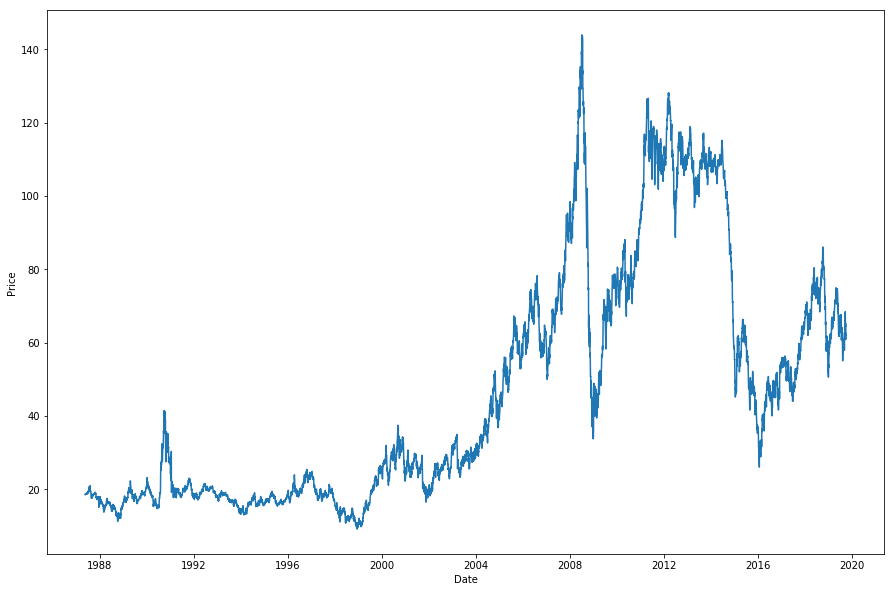

In [37]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(indexedDataset)
plt.show()

In [38]:
#Determining rolling statistic
rolmean=indexedDataset.rolling(window=365).mean()
rolstd=indexedDataset.rolling(window=365).std()
print(rolmean,rolstd)

                Price
Date                 
1987-05-20        NaN
1987-05-21        NaN
1987-05-22        NaN
1987-05-25        NaN
1987-05-26        NaN
1987-05-27        NaN
1987-05-28        NaN
1987-05-29        NaN
1987-06-01        NaN
1987-06-02        NaN
1987-06-03        NaN
1987-06-04        NaN
1987-06-05        NaN
1987-06-08        NaN
1987-06-09        NaN
1987-06-10        NaN
1987-06-11        NaN
1987-06-12        NaN
1987-06-16        NaN
1987-06-17        NaN
1987-06-18        NaN
1987-06-19        NaN
1987-06-22        NaN
1987-06-23        NaN
1987-06-24        NaN
1987-06-25        NaN
1987-06-26        NaN
1987-06-29        NaN
1987-06-30        NaN
1987-07-01        NaN
...               ...
2019-08-20  69.170027
2019-08-21  69.160164
2019-08-22  69.149753
2019-08-23  69.135973
2019-08-26  69.119425
2019-08-27  69.101945
2019-08-28  69.086658
2019-08-29  69.065945
2019-08-30  69.044192
2019-09-02  69.015479
2019-09-03  68.985671
2019-09-04  68.963890
2019-09-05

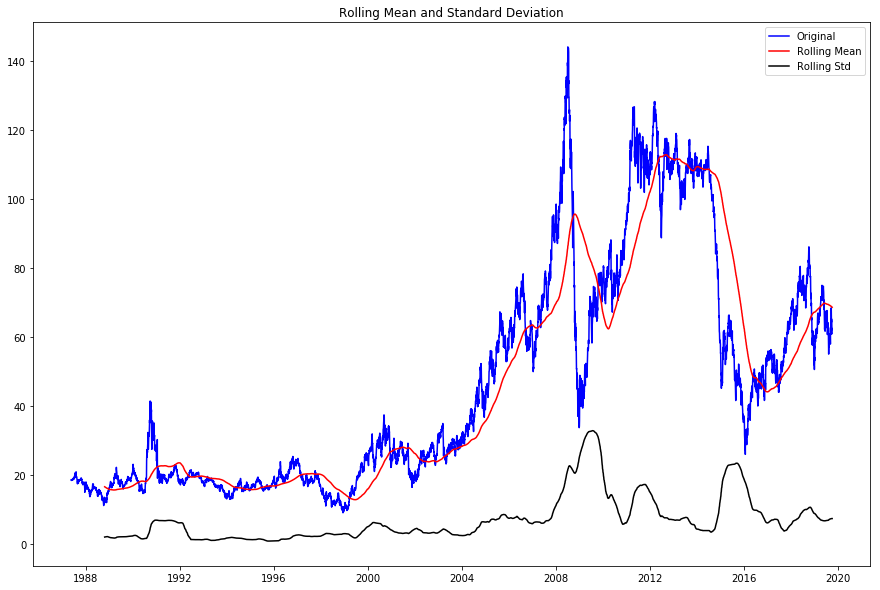

In [39]:
# Rolling Statistics
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [40]:
# Dickey_Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Result od Dickey_Fuller Test:')
dftest=adfuller(indexedDataset['Price'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P-Value','#lags Used','Number of observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Result od Dickey_Fuller Test:
Test Statistics                 -1.954749
P-Value                          0.306759
#lags Used                      35.000000
Number of observation Used    8180.000000
Critical Value (1%)             -3.431150
Critical Value (5%)             -2.861893
Critical Value (10%)            -2.566958
dtype: float64


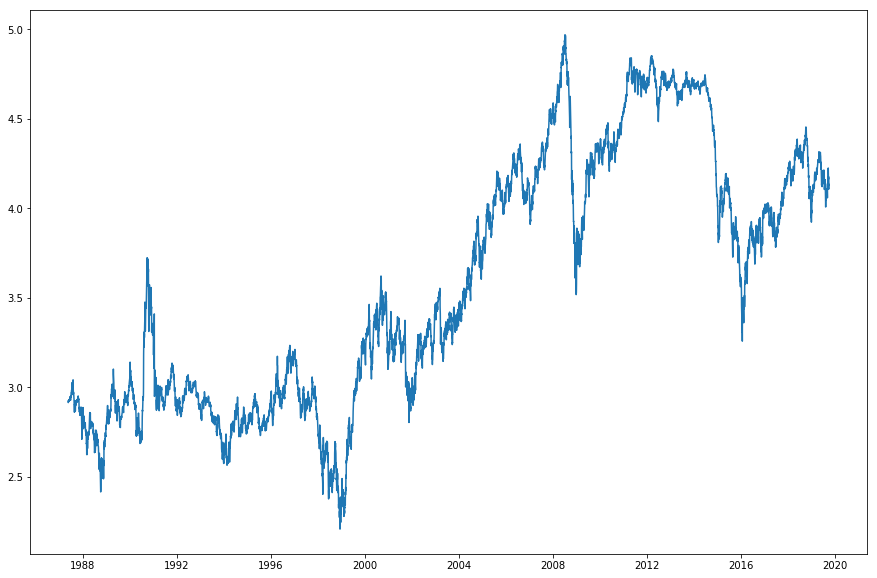

In [41]:
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

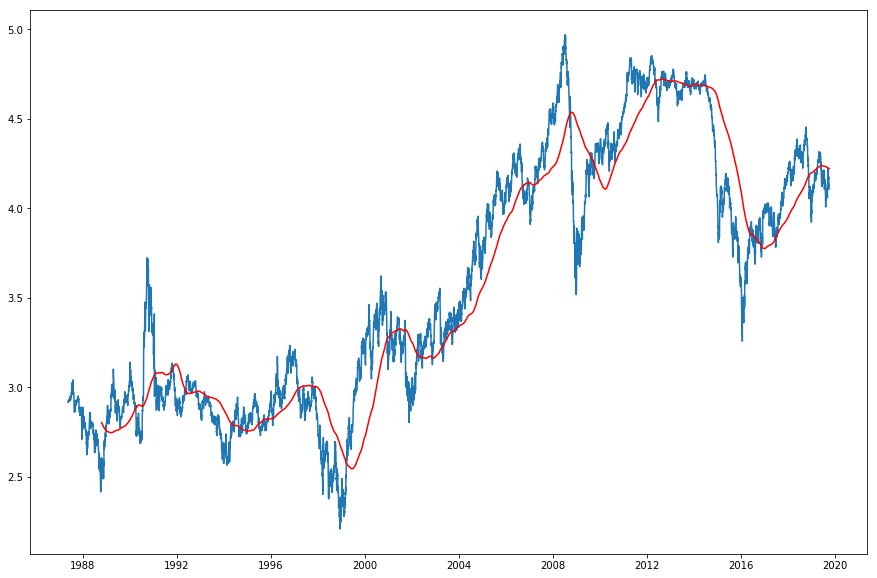

In [42]:
movingAverage=indexedDataset_logScale.rolling(window=365).mean()
movingstd=indexedDataset_logScale.rolling(window=365).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='r')

In [43]:
datasetlogscaleminusmovingaverage=indexedDataset_logScale-movingAverage
datasetlogscaleminusmovingaverage.head()

#Dropna
datasetlogscaleminusmovingaverage.dropna(inplace=True)
datasetlogscaleminusmovingaverage.head()

,Price
Date,
1988-10-20,-0.200361
1988-10-21,-0.200957
1988-10-24,-0.299595
1988-10-25,-0.308305
1988-10-26,-0.307122


In [44]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining rolling statistic
    movingaverage=timeseries.rolling(window=365).mean()
    mobingstd=timeseries.rolling(window=365).std()
    # Rolling Statistics
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(movingaverage,color='red',label='Rolling Mean')
    std=plt.plot(mobingstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Perform # Dickey_Fuller Test
    print('Result od Dickey_Fuller Test:')
    dftest=adfuller(timeseries['Price'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P-Value','#lags Used','Number of observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
    

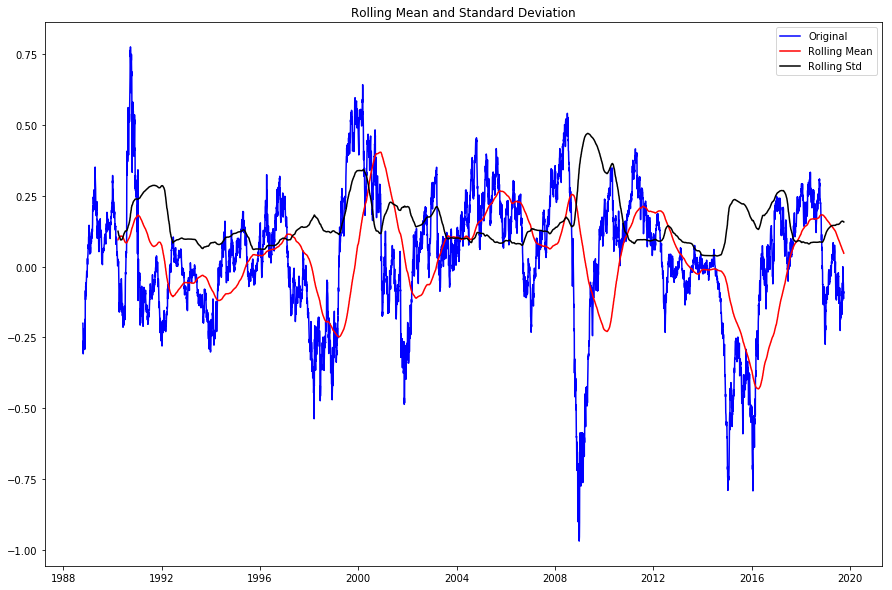

Result od Dickey_Fuller Test:
Test Statistics                 -4.963751
P-Value                          0.000026
#lags Used                      15.000000
Number of observation Used    7836.000000
Critical Value (1%)             -3.431185
Critical Value (5%)             -2.861909
Critical Value (10%)            -2.566966
dtype: float64


In [45]:
test_stationarity(datasetlogscaleminusmovingaverage)

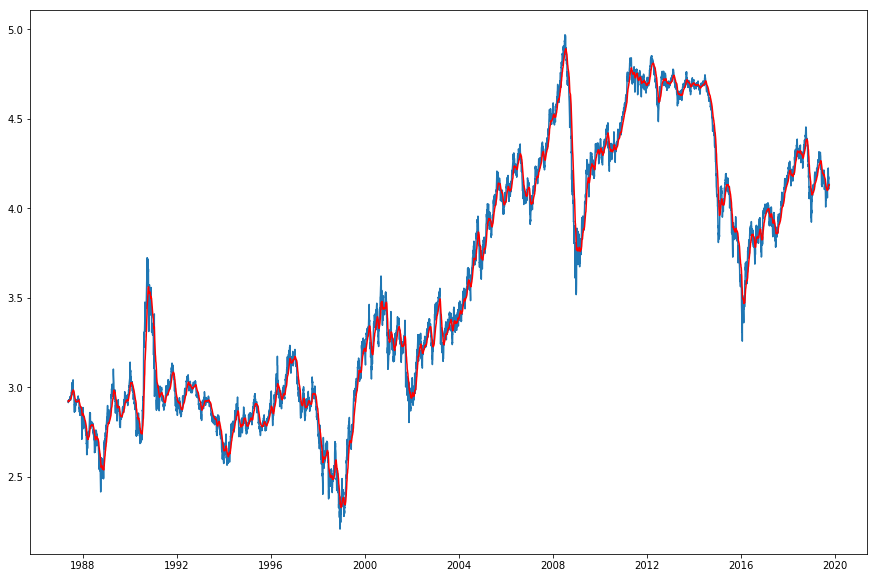

In [46]:
exponentialdecayweightedaverage=indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialdecayweightedaverage,color='r')

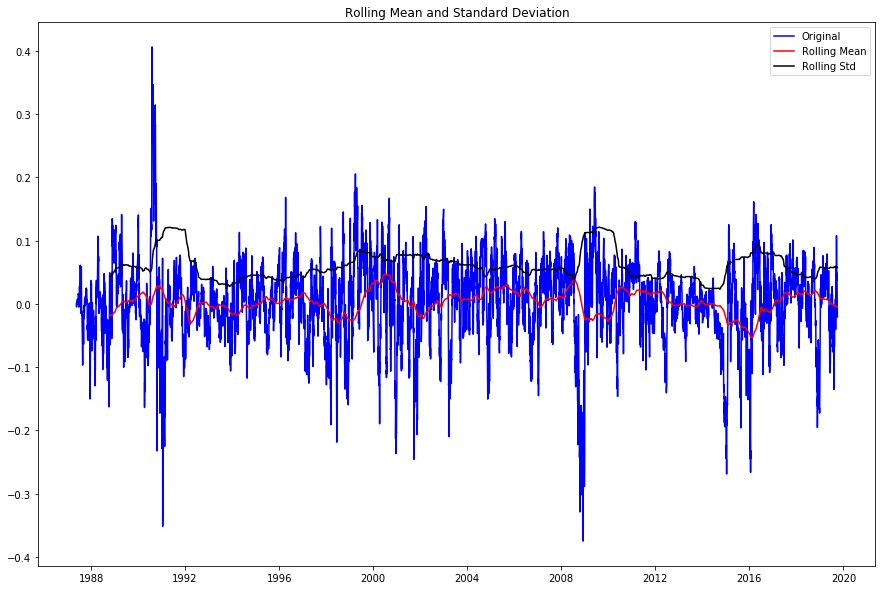

Result od Dickey_Fuller Test:
Test Statistics              -1.283031e+01
P-Value                       5.892793e-24
#lags Used                    1.500000e+01
Number of observation Used    8.200000e+03
Critical Value (1%)          -3.431148e+00
Critical Value (5%)          -2.861893e+00
Critical Value (10%)         -2.566958e+00
dtype: float64


In [47]:
indexedDataset_logScaleminusexponentialdecayweightedaverage=indexedDataset_logScale-exponentialdecayweightedaverage
test_stationarity(indexedDataset_logScaleminusexponentialdecayweightedaverage)

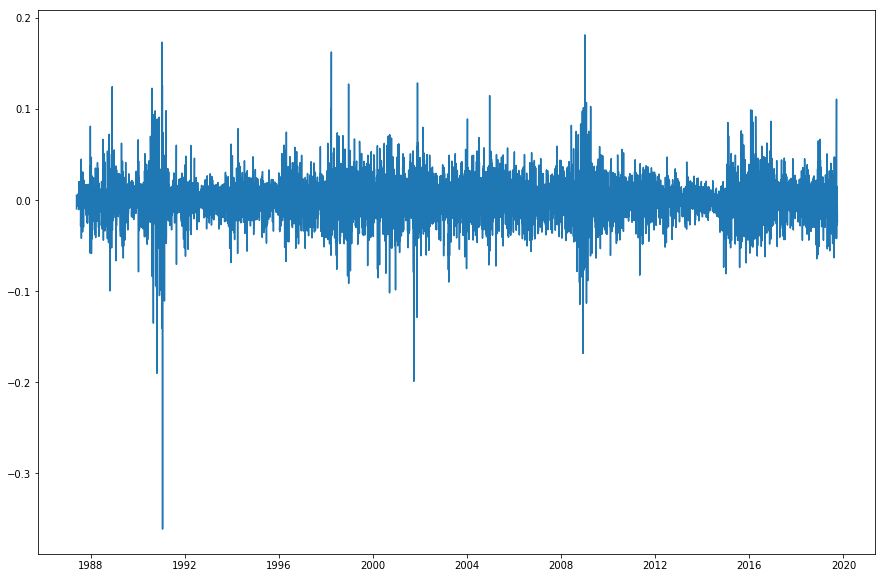

In [48]:
datalogDiffshifting=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datalogDiffshifting)

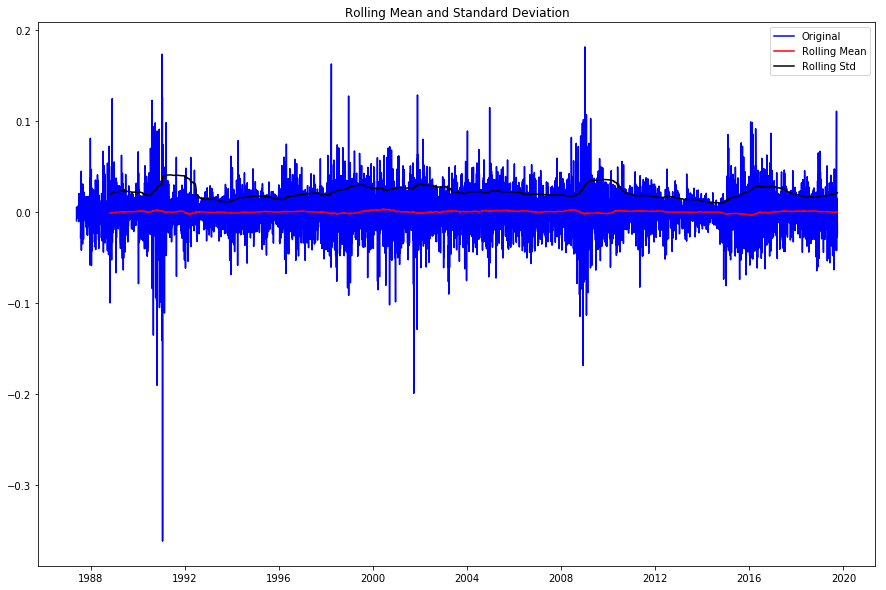

Result od Dickey_Fuller Test:
Test Statistics                -21.500963
P-Value                          0.000000
#lags Used                      14.000000
Number of observation Used    8200.000000
Critical Value (1%)             -3.431148
Critical Value (5%)             -2.861893
Critical Value (10%)            -2.566958
dtype: float64


In [49]:
datalogDiffshifting.dropna(inplace=True)
test_stationarity(datalogDiffshifting)

C:\Users\Amir\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Amir\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS:4.2186')

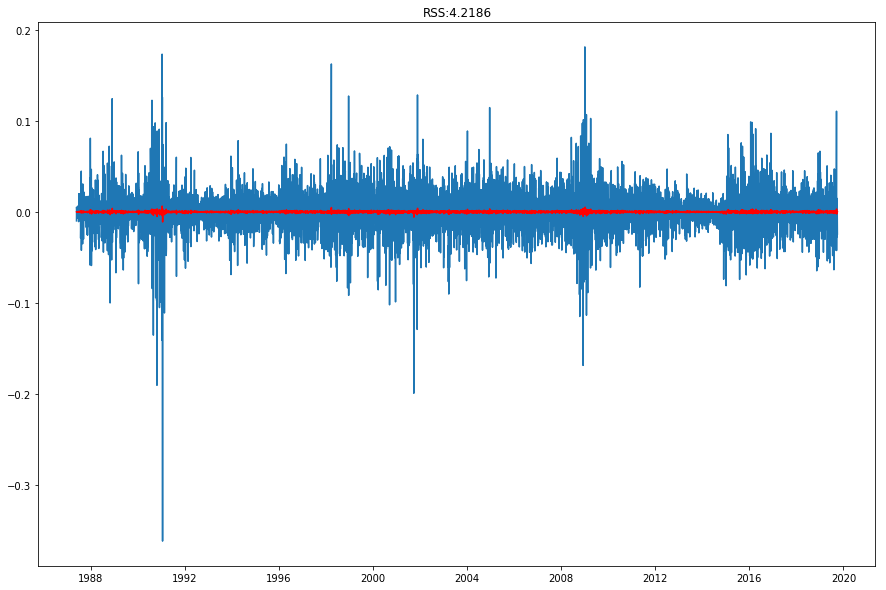

In [50]:
from statsmodels.tsa.arima_model import ARIMA
# AR model

model=ARIMA(indexedDataset_logScale,order=(2,1,0))
result_AR=model.fit(disp=-1)
plt.plot(datalogDiffshifting)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum((result_AR.fittedvalues-datalogDiffshifting['Price'])**2))



C:\Users\Amir\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Amir\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS:4.2170')

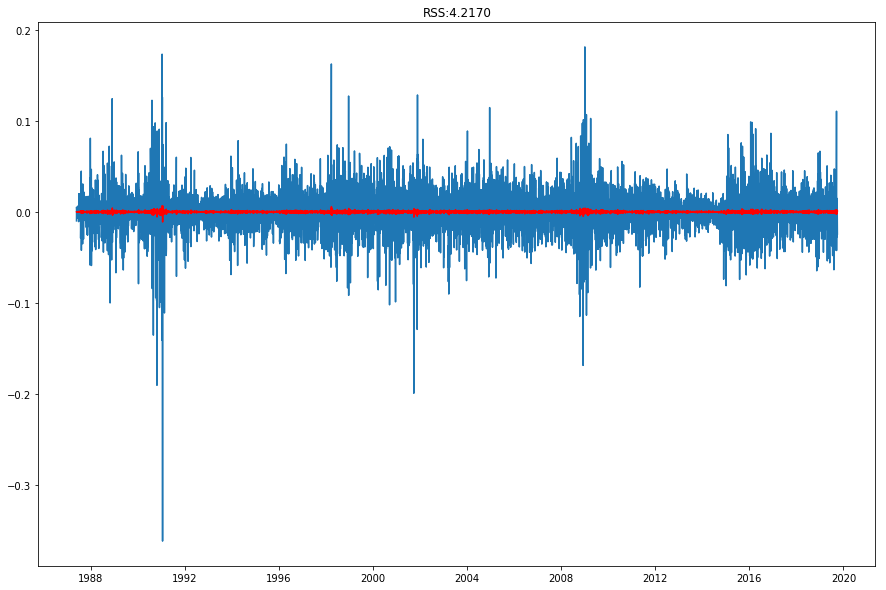

In [51]:
model=ARIMA(indexedDataset_logScale,order=(2,1,2))
result_MA=model.fit(disp=-1)
plt.plot(datalogDiffshifting)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum((result_MA.fittedvalues-datalogDiffshifting['Price'])**2))

In [52]:
prediction=pd.Series(result_AR.fittedvalues,copy=True)

In [53]:
print(prediction.head())

Date
1987-05-21    0.000144
1987-05-22   -0.000144
1987-05-25    0.000391
1987-05-26    0.000171
1987-05-27    0.000164
dtype: float64


In [54]:
# convert to cumulative sum
pedictions_arima_diff_cumsum=prediction.cumsum()
print(pedictions_arima_diff_cumsum.head())

Date
1987-05-21    1.442584e-04
1987-05-22    1.520178e-07
1987-05-25    3.911311e-04
1987-05-26    5.618776e-04
1987-05-27    7.258676e-04
dtype: float64


In [55]:
predictions_arima_log=pd.Series(indexedDataset_logScale['Price'].ix[0],index=indexedDataset_logScale.index)
predictions_arima_log=predictions_arima_log.add(pedictions_arima_diff_cumsum,fill_value=0)

predictions_arima_log.head()

C:\Users\Amir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
1987-05-20    2.924773
1987-05-21    2.924917
1987-05-22    2.924773
1987-05-25    2.925164
1987-05-26    2.925335
dtype: float64

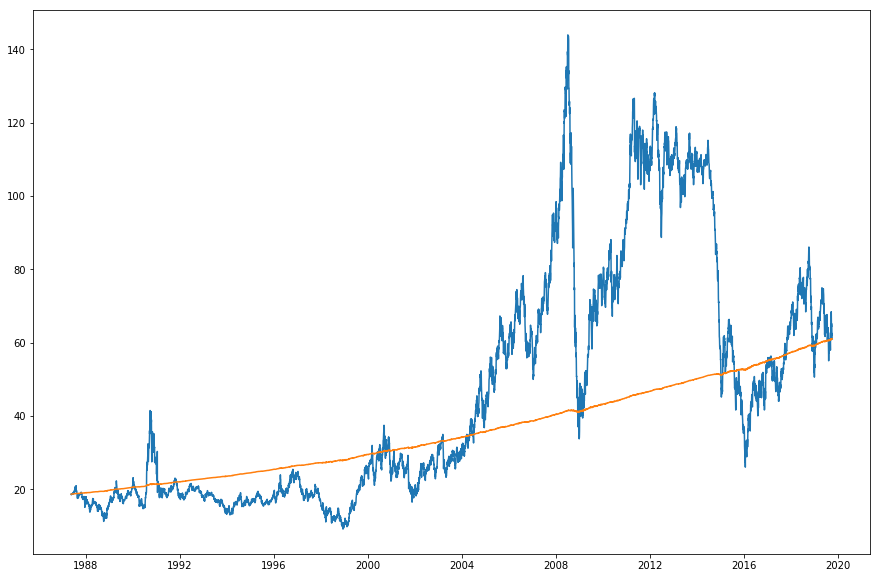

In [56]:
predictions_arima=np.exp(predictions_arima_log)
plt.plot(indexedDataset)
plt.plot(predictions_arima)

(array([4.11007879, 4.11042518, 4.11058259, 4.11072536, 4.11086946,
        4.11101372, 4.11115798, 4.11130224, 4.1114465 , 4.11159076,
        4.11173502, 4.11187928, 4.11202353, 4.11216779, 4.11231205,
        4.11245631, 4.11260057, 4.11274483, 4.11288909, 4.11303334,
        4.1131776 , 4.11332186, 4.11346612, 4.11361038, 4.11375464,
        4.11389889, 4.11404315, 4.11418741, 4.11433167, 4.11447593,
        4.11462019, 4.11476444, 4.1149087 , 4.11505296, 4.11519722,
        4.11534148, 4.11548574, 4.11563   , 4.11577425, 4.11591851,
        4.11606277, 4.11620703, 4.11635129, 4.11649555, 4.1166398 ,
        4.11678406, 4.11692832, 4.11707258, 4.11721684, 4.1173611 ,
        4.11750535, 4.11764961, 4.11779387, 4.11793813, 4.11808239,
        4.11822665, 4.11837091, 4.11851516, 4.11865942, 4.11880368,
        4.11894794, 4.1190922 , 4.11923646, 4.11938071, 4.11952497,
        4.11966923, 4.11981349, 4.11995775, 4.12010201, 4.12024626,
        4.12039052, 4.12053478, 4.12067904, 4.12

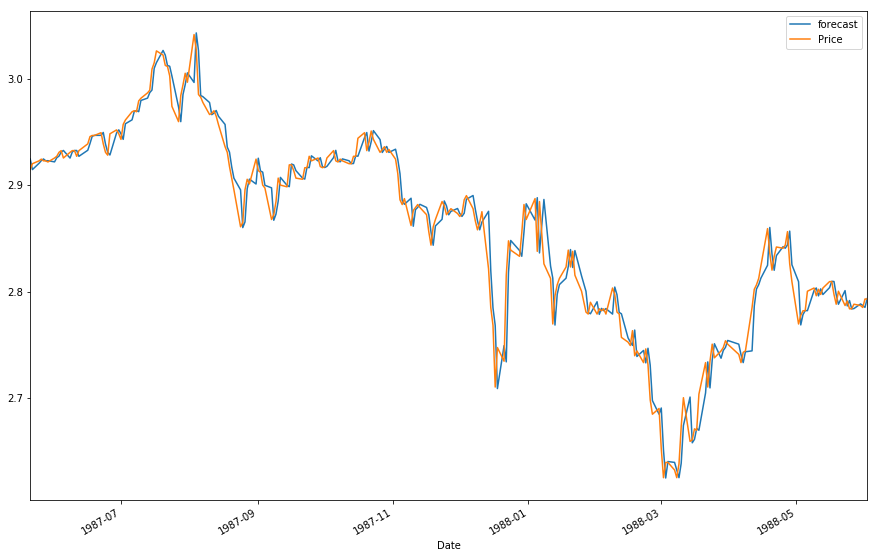

In [58]:
result_AR.plot_predict(1,264)
result_AR.forecast(steps=120)